In [33]:
%autosave 0

import random
import pandas as pd
import matplotlib.pyplot as plt
from math import sin, pi
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

Autosave disabled


### série (vecteur) avec juste du bruit, soit un tirage de n valeurs gaussiennes centrées réduites

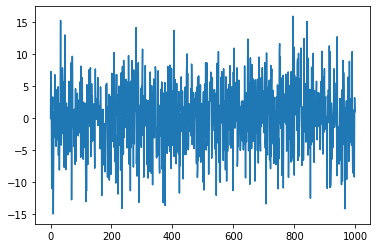

In [2]:
serie1 = [random.gauss(0, 5) for i in range(1000)]
plt.plot(serie1);

### série linéaire y(t) = a*t+b

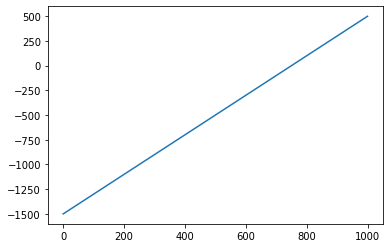

In [3]:
a, b = 2, -1500
serie2 = [a*t+b for t in range(1000)]
plt.plot(serie2);

### série oscillante y(t) = A * sin(omega*t+fi)

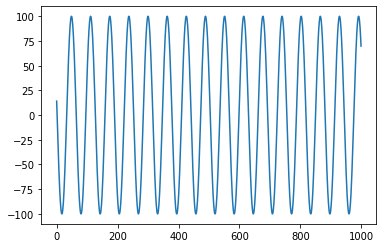

In [4]:
A, omega, fi = 100, 0.1, 3
serie3 = [A*sin(omega*t+fi) for t in range(1000)]
plt.plot(serie3);

### additionner la série 2) et la 3)

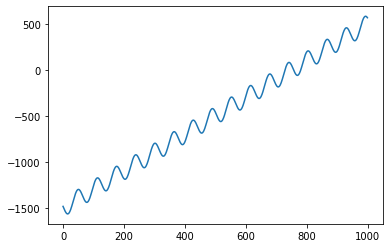

In [5]:
serie6 = [serie2[i] + serie3[i]
               for i in range(len(serie2))]
plt.plot(serie6);

### multiplier la série 2) et la 3)

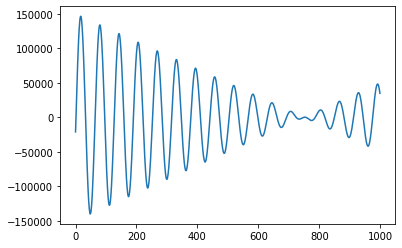

In [6]:
serie7 = [serie2[i] * serie3[i]
               for i in range(len(serie2))]
plt.plot(serie7);

### ajouter la série 1) * coefficient à la série 6)

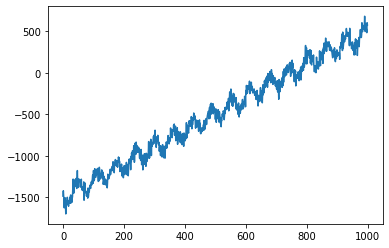

In [7]:
serie8 = [10*serie1[i] + serie6[i]
               for i in range(len(serie1))]
plt.plot(serie8);

### mulltiplier la série 7) par la série 1)

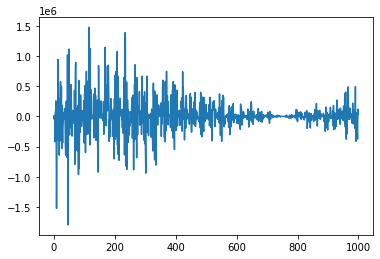

In [8]:
serie9 = [serie1[i] * serie7[i]
               for i in range(len(serie1))]
plt.plot(serie9);

### décomposer les séries 2) et 3)
-> retrouver a, b, A, omega, fi

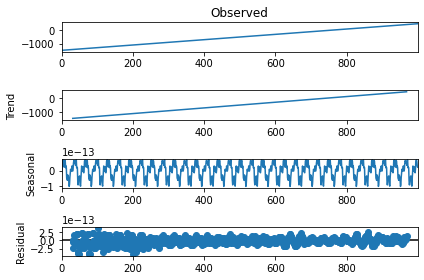

In [47]:
result8 = seasonal_decompose(serie2, period=int(2*pi/omega), model='additive')
result8.plot();

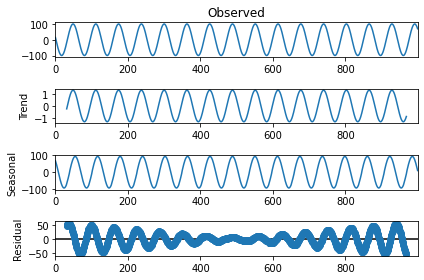

In [48]:
result8bis = seasonal_decompose(serie3, period=int(2*pi/omega), model='additive')
result8bis.plot();

### décomposer les séries 8) et 9)
-> retrouver a, b, A, omega, fi

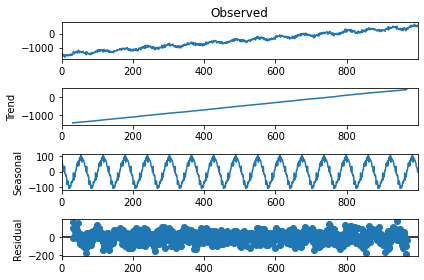

In [45]:
result9 = seasonal_decompose(serie8, period=int(2*pi/omega), model='additive')
result9.plot();

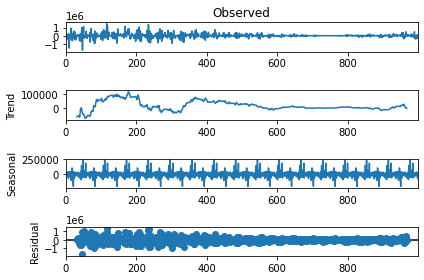

In [46]:
result9bis = seasonal_decompose(serie9, period=int(2*pi/omega), model='additive')
result9bis.plot();

### voir ce qu'il se passe quand le coefficient du bruit devient très grand

-> le bruit est trop gênant est on le retrouve dans le trend et la saisonnalité

### Analyse de la stationnarité

In [55]:
adfuller(serie1[100:-100])

(-29.681424926662746,
 0.0,
 0,
 799,
 {'1%': -3.4385608049885876,
  '5%': -2.865164107438179,
  '10%': -2.5686998068142124},
 4727.2687673340915)

In [56]:
adfuller(serie2[100:-100])

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


(12.186598934544158,
 1.0,
 8,
 791,
 {'1%': -3.4386441190814265,
  '5%': -2.8652008302305316,
  '10%': -2.568719369407094},
 -inf)

In [57]:
adfuller(serie3[100:-100])

(-34520600949470.973,
 0.0,
 1,
 798,
 {'1%': -3.4385711275998583,
  '5%': -2.8651686574447375,
  '10%': -2.568702230639255},
 -41613.19521824885)

In [49]:
adfuller(result8.resid[100:-100])

(-7.569411628202666,
 2.8677043587374006e-11,
 20,
 779,
 {'1%': -3.4387723094153286,
  '5%': -2.8652573313919625,
  '10%': -2.5687494684274794},
 -45171.646723549326)

In [50]:
adfuller(result8bis.resid[100:-100])

(-8.480536865665025,
 1.3970748027332878e-13,
 21,
 778,
 {'1%': -3.438783171038672,
  '5%': -2.865262118650577,
  '10%': -2.568752018688748},
 1276.6326273974353)

In [51]:
adfuller(result9.resid[100:-100])

(-7.49418289761999,
 4.424157059752476e-11,
 21,
 778,
 {'1%': -3.438783171038672,
  '5%': -2.865262118650577,
  '10%': -2.568752018688748},
 8333.726333512197)

In [52]:
adfuller(result9bis.resid[100:-100])

(-18.589871628336066,
 2.0739805004887526e-30,
 2,
 797,
 {'1%': -3.438581476199162,
  '5%': -2.865173218890781,
  '10%': -2.56870466056054},
 21379.101114824716)